In [110]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

In [145]:
pref = '../outputs/t65/output_'
#pref = '../outputs/new_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n1024/output_'
HoR  = 1e-3
filenames = get_fn_list(pref,0,409201)
full_data = []
for i,fn in enumerate(filenames):
    print "Loading file %d..." % i
    full_data.append(build_table(fn,HoR))

Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Loading file 12...
Loading file 13...
Loading file 14...
Loading file 15...
Loading file 16...
Loading file 17...
Loading file 18...
Loading file 19...
Loading file 20...
Loading file 21...
Loading file 22...
Loading file 23...
Loading file 24...
Loading file 25...
Loading file 26...
Loading file 27...
Loading file 28...
Loading file 29...
Loading file 30...
Loading file 31...
Loading file 32...
Loading file 33...
Loading file 34...
Loading file 35...
Loading file 36...
Loading file 37...
Loading file 38...
Loading file 39...
Loading file 40...
Loading file 41...
Loading file 42...
Loading file 43...
Loading file 44...
Loading file 45...
Loading file 46...
Loading file 47...
Loading file 48...
Loading file 49...
Loading file 50...
Loading file 51...
Loading file 52...
Loa

IOError: ../outputs/t65/output_102.csv not found.

In [146]:
for i in range(no_file):
    full_data[i]["prec"] -= full_data[i]["prec"][-1]

In [147]:
no_file = len(full_data)

p_old = full_data[0]["prec"]
t_old = full_data[0]["t"][0]
full_data[0]["dpdt"] = np.zeros(len(full_data[0]["prec"]))
for i in range(1,no_file):
    p_new = full_data[i]["prec"]
    t_new = full_data[i]["t"][0]
    dt = t_new - t_old
    print t_new, t_old, dt
    dp = p_new - p_old
    print dp,dt
    full_data[i]["dpdt"] = dp/dt
    p_old = np.copy(p_new)
    t_old = np.copy(t_new)

437908.1 0.0 437908.1
         prec        
---------------------
    18409.35059369117
   18409.350592496663
   18229.350595111013
    18175.27768556878
    18032.71011987942
   18022.775695282755
   17992.149377562455
   17842.660436283757
    17663.32280550138
   17510.797531795073
                  ...
   201.57433033597437
   198.26443892009513
      195.10292762192
    192.0831726684342
    189.1999307380607
   186.44599835701078
    183.8654414784431
   181.19323162879957
   179.99999706030823
8.167500311628828e-07
                  0.0
Length = 260 rows 437908.1
875464.8 437908.1 437556.70000000007
         prec         
----------------------
     776.1707683006462
     596.1707762611659
     776.1707647427138
     798.2265400373726
      878.525552142888
     827.9818955735427
     837.8592286883068
     947.2281976918748
     1034.808863737133
    1182.4258257442452
                   ...
   -158.56242575682083
   -161.84775196331364
   -164.98646775913406
   -167.9843809872

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]


In [148]:
init_mass = integrate_mass(full_data[0])
for i in range(1,len(full_data)):
    print (init_mass - integrate_mass(full_data[i]))/init_mass

0.0629133123974822
0.10313068205967293
0.13856874639558672
0.17136011488542907
0.20215713229706872
0.23125385391974126
0.2587248840071624
0.2848291061440532
0.3097049250357431
0.3334929461826374
0.35614380620717345
0.3775227123167976
0.39751249799457894
0.416157225472721
0.43359726096557843
0.4499741677407537
0.46530377190085553
0.47949904234676355
0.4924274625240056
0.504071701961248
0.5145694655367097
0.524076282861499
0.5327396068540121
0.5405799796933243
0.547571277477943
0.5536856993995884
0.5589862778711779
0.5636249248778182
0.5677350103145277
0.5714367258886287
0.5747266355106359
0.5776359461354678
0.5801576445789847
0.5823216248979609
0.5842144295868574
0.5859059348850465
0.5874754070819969
0.588919193752066
0.5902184246262319
0.5913422720357385
0.5923186778506961
0.5932096927385386
0.5940131226924329
0.5947695842765119
0.5955410914273167
0.5962577012810673
0.5968973918982448
0.5974805192064868
0.5980137828251834
0.5985149540891856
0.598988721612523
0.5994306574601075
0.599903

81392.76447837909
(102, 260, 13)
time = 4.379081e+05


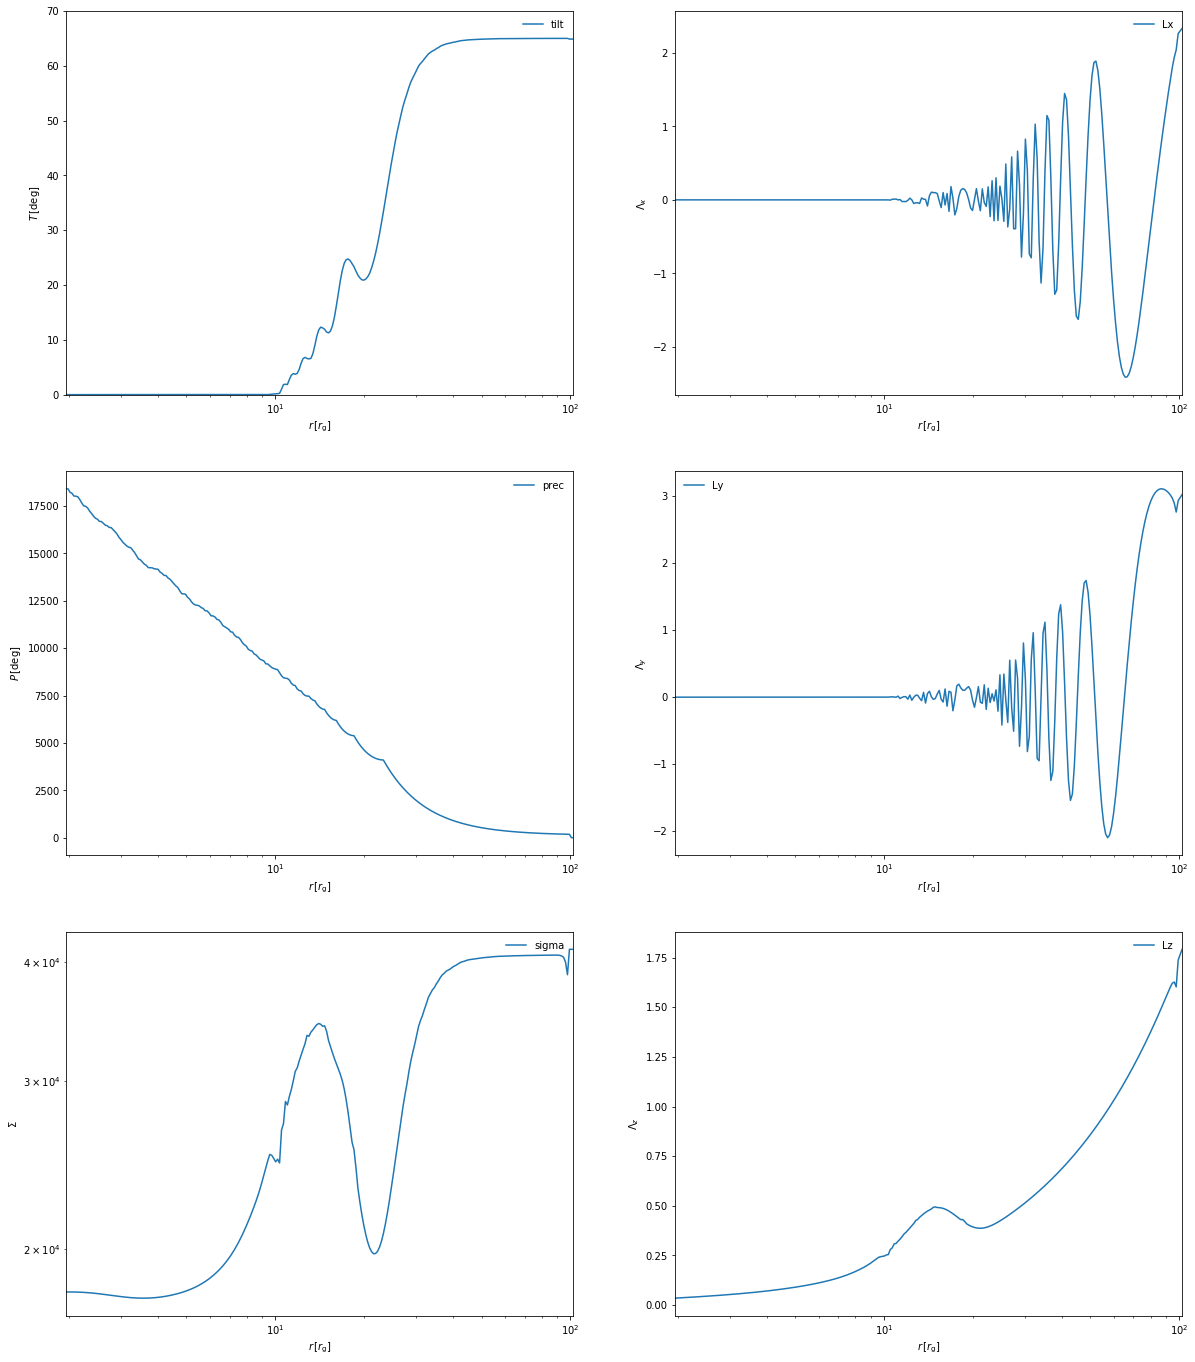

In [149]:
def plot_interface(table):
    plot_r  = table["r"]
    plot_d  = table["sigma"]
    plot_Lx = table["Lx"]
    plot_Ly = table["Ly"]
    plot_Lz = table["Lz"]
    plot_t  = table["tilt"]
    plot_p  = table["prec"]
    plot_dpdt = table["dpdt"]
    
    time   = table["t"][0]
    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    print "time = %e" % time
    
    fig, ax = plt.subplots(3,2,figsize=(20,24))
    
    ax[0][0].plot(plot_r,plot_t)
    ax[0][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][0].set_ylabel(r'$T\,[{\rm deg}]$')
    ax[0][0].set_ylim(0,70)
    ax[0][0].set_xlim(rmin,rmax)
    ax[0][0].set_xscale('log')
    ax[0][0].legend(frameon=False)

    ax[1][0].plot(plot_r,plot_p)
    ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][0].set_ylabel(r'$P\,[{\rm deg}]$')
    #ax[1][0].set_ylim(-1e-4,1e-4)
    ax[1][0].set_xlim(rmin,rmax)
    ax[1][0].set_xscale('log')
    ax[1][0].legend(frameon=False)

    ax[2][0].plot(plot_r,plot_d)
    ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][0].set_ylabel(r'$\Sigma$')
    #ax[2][0].set_ylim(-1e-4,1e-4)
    ax[2][0].set_xlim(rmin,rmax)
    ax[2][0].set_xscale('log')
    ax[2][0].set_yscale('log')
    ax[2][0].legend(frameon=False)

    ax[0][1].plot(plot_r,plot_Lx)
    ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][1].set_ylabel(r'$\Lambda_x$')
    #ax[0][1].set_ylim(0,50000)
    ax[0][1].set_xlim(rmin,rmax)
    ax[0][1].set_xscale('log')
    ax[0][1].legend(frameon=False)

    if 1: # Ly
        ax[1][1].plot(plot_r,plot_Ly)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\Lambda_y$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)
    if 0: # dpdt
        ax[1][1].plot(plot_r,plot_dpdt)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\dot{P}$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)


    ax[2][1].plot(plot_r,plot_Lz)
    ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][1].set_ylabel(r'$\Lambda_z$')
    #ax[2][1].set_ylim(-1e-3,1e-3)
    ax[2][1].set_xlim(rmin,rmax)
    ax[2][1].set_xscale('log')
    ax[2][1].legend(frameon=False)

    
    return fig

print np.max(full_data[0]["sigma"])
print np.shape(full_data)
fig = plot_interface(full_data[1])

plt.show()
    


time = 2.550671e+06
(2,)


<Figure size 432x288 with 0 Axes>

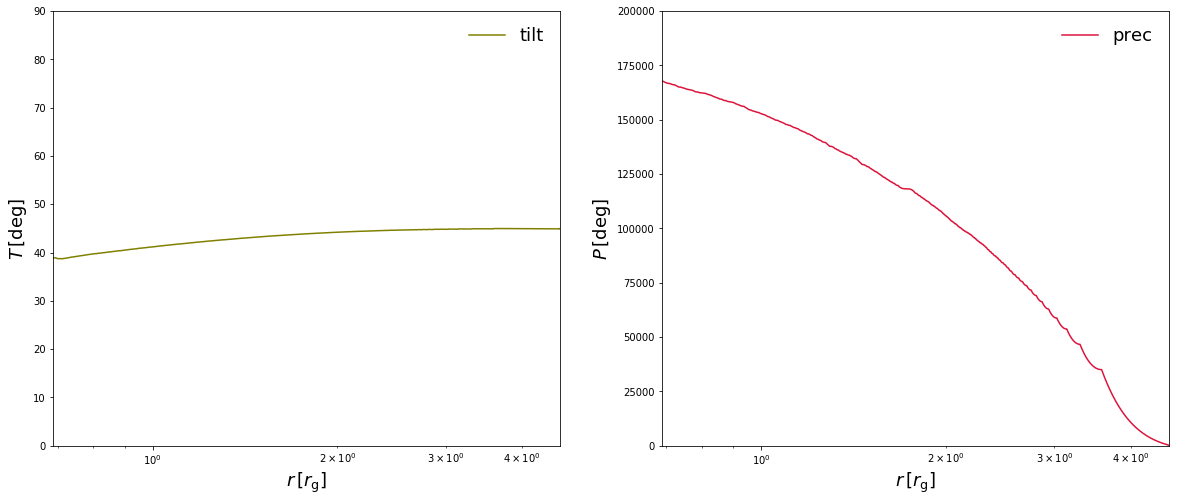

In [13]:
def plot_interface_vid(table):
    plot_r  = table["r"]
    plot_d  = table["sigma"]
    plot_p  = table["prec"]
    plot_t  = table["tilt"]

    time   = table["t"][0]
    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    print "time = %e" % time
    
    fig, ax = plt.subplots(1,2,figsize=(20,8))

    print np.shape(ax)
    ax[0].plot(plot_r,plot_t,color='olive')
    ax[0].set_xlabel(r'$r\,[r_{\rm g}]$',fontsize=18)
    ax[0].set_ylabel(r'$T\,[{\rm deg}]$',fontsize=18)
    ax[0].set_ylim(0,90)
    ax[0].set_xlim(rmin,rmax)
    ax[0].set_xscale('log')
    ax[0].legend(frameon=False,fontsize=18)

    ax[1].plot(plot_r,plot_p,color='crimson')
    ax[1].set_xlabel(r'$r\,[r_{\rm g}]$',fontsize=18)
    ax[1].set_ylabel(r'$P\,[{\rm deg}]$',fontsize=18)
    ax[1].set_ylim(0,200000)
    ax[1].set_xlim(rmin,rmax)
    ax[1].set_xscale('log')
    #ax[1].set_yscale('log')
    ax[1].legend(frameon=False,fontsize=18)

    return fig

plt.clf()
fig = plot_interface_vid(full_data[-1])
plt.show()

In [14]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/t45"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,100,1):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface_vid(full_data[i])
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

time = 0.000000e+00
(2,)
time = 2.551039e+04
(2,)
time = 5.102391e+04
(2,)
time = 7.651989e+04
(2,)
time = 1.020320e+05
(2,)
time = 1.275579e+05
(2,)
time = 1.530417e+05
(2,)
time = 1.785479e+05
(2,)
time = 2.040636e+05
(2,)
time = 2.295670e+05
(2,)
time = 2.550814e+05
(2,)
time = 2.805968e+05
(2,)
time = 3.060908e+05
(2,)
time = 3.315989e+05
(2,)
time = 3.570977e+05
(2,)
time = 3.826144e+05
(2,)
time = 4.081267e+05
(2,)
time = 4.336366e+05
(2,)
time = 4.591444e+05
(2,)
time = 4.846365e+05
(2,)
time = 5.101467e+05
(2,)
time = 5.356411e+05
(2,)
time = 5.611509e+05
(2,)
time = 5.866650e+05
(2,)
time = 6.121761e+05
(2,)
time = 6.376687e+05
(2,)
time = 6.631749e+05
(2,)
time = 6.886858e+05
(2,)
time = 7.141960e+05
(2,)
time = 7.396938e+05
(2,)
time = 7.652198e+05
(2,)
time = 7.907215e+05
(2,)
time = 8.162157e+05
(2,)
time = 8.417330e+05
(2,)
time = 8.672321e+05
(2,)
time = 8.927420e+05
(2,)
time = 9.182597e+05
(2,)
time = 9.437532e+05
(2,)
time = 9.692643e+05
(2,)
time = 9.947611e+05
(2,)


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>